# Optimization and Differential Equation

I can use scipy.optimize to optimize the dimensions of a rectangular box without a lid while keeping the surface area fixed. I will need the equation of a rectangular box with the height, length, and width as parameters to be determined. The surface area will be used to find the dimensions because there is only so much 'cardboard' (surface area) to be used.

I would also like to use odeint to solve the differential equation for a non-steady state oscillation. I will plot the behavior of a linear oscillator subjected to a quick, discontinuous force. This impulsive force can be from a step or spike (delta function). The time evolution of the oscillator after the impulsive force (whichever one it may have been) follow a similar damped sinusoidal curve with the amplitude decreasing as time progresses.  


## Box without the lid

### Importing Packages

In [1]:
import numpy as np
from scipy.optimize import minimize

### Main code

In [2]:
def volume(x):   # defining a function for volume
    X = x[0]
    y = x[1]
    z = x[2]
    V = X*y*z 
    return V

def surface(x): # defining a function for surface area
    X = x[0]
    y = x[1]
    z = x[2]
    SA = 2*X*z + 2*y*z + X*y
    return SA

def objective(x):
    return -volume(x)  # negative because I wish to maximize volume


def constraint(x):
    return surface(x) - 100   # constraining surface to 100 units squared

cons = ({'type': 'eq', 'fun': constraint})

x0 = np.array([1, 2,3]) # initial conditions, taking a guess at the answer

solution = minimize(objective,x0,method='SLSQP',constraints=cons)


In [3]:
print(solution)

     fun: -96.22504482992933
     jac: array([-16.66663074, -16.6666584 , -33.33342552])
 message: 'Optimization terminated successfully.'
    nfev: 63
     nit: 12
    njev: 12
  status: 0
 success: True
       x: array([5.77351555, 5.77350579, 2.88674336])


#### x: array([5.77351555, 5.77350579, 2.88674336]) shows the value of x, y, and z respectively

### A more compact code

In [7]:
def objective(x):  # function that returns the volume
    X = x[0]
    y = x[1]
    z = x[2]
    return -X*y*z # negative to maximize
def constraint(x):  # constraint the surface area to be less than 100
    return 2*x[0]*x[2] + 2*x[1]*x[2] + x[0]*x[1] - 100

x0 = [12,10,11]  # initital guess

cons = [{'type': 'eq', 'fun': constraint}]  # dictionary
solution2 = minimize(objective,x0,method='SLSQP',constraints=cons)

#### In the above code I eliminated the volume() and surface() functions. My objective() function returns the volume and the constraint function returns the surface area constrained to be below 100. I already knew what the solution is for the parameters so I decided to guess the lengths away from the true value. I obtained the same values as before. 

In [8]:
print(solution2)

     fun: -96.22504483979922
     jac: array([-16.66667366, -16.66668034, -33.33329582])
 message: 'Optimization terminated successfully.'
    nfev: 77
     nit: 15
    njev: 15
  status: 0
 success: True
       x: array([5.77350067, 5.77349821, 2.8867546 ])


## Response to an impulse function

### Importing Packages

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

### Main code

In [10]:
#   x == x[0]
#   x' = xdot == x[1] 
#    x'' = xddot == ddx
#   x'' + 2*Bx' +omega^2 * x = 0_____________ where B < omega
#   x'' = ddx = -2x' + omega^2 * x = 0
#   x(t) =  coswt*exp(-B*t)
#   w = sqrt{omega^2 - B^2} = 3.87 rad/s
#   omega = 4 rad/s
#   B = 1
#   
def xddot(x, t):   # This function will return [xdot, xddot]. The sequential, differentiated points.
    xdot = x[1]

    ddx = -2*x[1] - 16*np.cos(3.87*t)*np.exp(-t)   # x'' =  - 2*Bx' - omega^2 * x
    return[xdot,ddx]                               # x = x(t) =  coswt*exp(-B*t) 

x0 = [0,0]      # initial condition
t = np.linspace(0, 5, 200) # time interval
diff = odeint(xddot,x0, t)   
A = diff[:,0]

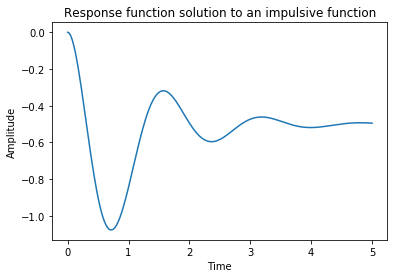

In [11]:
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Response function solution to an impulsive function")
plt.plot(t,A);

The  above  plot  shows  the  time  evolution  of  a  damped  harmonic
oscillator that came into contact with a short lived, discontinuos driving force

Initially, I wanted to solve the second order differential equation for a damped oscillator in response to a forcing function in the form of a Dirac delta function. I tried using the special function scipy.signal.unit_impulse(shape, idx=None, dtype=<class 'float'>) from SciPy, but odeint cannot differentiate a broken function. Odeint differentiates continuous functions. I decided to plug in the general solution for x(t) into the second order differential equation. The general form is a product of an exponential and a sinusoidal function of time. I set the forcing function to zero because I am interested in the motion of the oscillator after the impulse.
